In [4]:
import pandas as pd
url = "https://raw.githubusercontent.com/jayasurya17/cmpe-256-term-project/master/clothing.csv"
clothing_data = pd.read_csv(url)
clothing_data

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


In [5]:
pip install surprise

     |████████████████████████████████| 11.8MB 8.2MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617548 sha256=e5890aff226b6fe05a97d5f3038d1bcaad2cd2e644c6f2a4b9988d77f4ed3ef3
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [6]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.pyplot import figure
from PIL import Image
import requests
from io import BytesIO
import os
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from scipy import sparse
import re

import warnings
warnings.simplefilter("ignore")


In [7]:
#checking missing values in (fit-no missing value, bust size- has M missing v, weight - has L missing v, rating has 82 missing)
clothing_data.count()

fit               192544
user_id           192544
bust size         174133
item_id           192544
weight            162562
rating            192462
rented for        192534
review_text       192482
body type         177907
review_summary    192199
category          192544
height            191867
size              192544
age               191584
review_date       192544
dtype: int64

In [8]:
clothing_data.dtypes

fit                object
user_id             int64
bust size          object
item_id             int64
weight             object
rating            float64
rented for         object
review_text        object
body type          object
review_summary     object
category           object
height             object
size                int64
age               float64
review_date        object
dtype: object

Methods for visualization

In [9]:
import matplotlib.pyplot as plt
import collections
import seaborn as sns
plt.style.use('fivethirtyeight')
# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

def plot_pie_chart(df, column, filename):
    fig, ax = plt.subplots()
    df[column].value_counts().plot(ax=ax, kind='pie')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def group_and_plot_pivot_graph(df, columns, filename):

    # Group by one or more columns of choice in the dataframe
    grouped_multiple = df.groupby(columns).size().reset_index()
    # Rename the grouped column with size of groups as count
    grouped_multiple.columns = columns + ['count']

    fig = plt.figure()
    grouped_multiple.pivot(columns[0], columns[1], 'count').plot(kind='bar')
    plt.ylabel('count')
    plt.legend(title=columns[1], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def plot_hist_graph(df, column, filename):
    fig, ax = plt.subplots()
    df[column].plot(ax=ax, kind='hist')
    plt.xlabel(column)
    plt.ylabel('count')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def plot_bar_graph(df, column, filename):
    fig, ax = plt.subplots()
    df[column].value_counts().plot(ax=ax, kind='bar')
    plt.xlabel(column)
    plt.ylabel('count')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def plot_line_chart(df, column, filename):
    frequency = collections.Counter(df[column])
    sorted_frequency = {}
    for key in sorted(frequency.keys()):
      sorted_frequency[key] = frequency[key]
    x = list(sorted_frequency.keys())
    y = list(sorted_frequency.values())
    fig, ax = plt.subplots()
    plt.plot(x, y)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()



PREPROCESSING FOR FIT

In [ ]:
clothing_data.fit.describe()

count     192544
unique         3
top          fit
freq      142058
Name: fit, dtype: object

In [ ]:
def compare_fit(x):
  if x == 'fit':
    return 0
  elif x == 'small':
    return -1
  else:
    return 1

clothing_data['fit'] = clothing_data['fit'].apply(lambda x: compare_fit(x))
#plot_pie_chart(clothing_data, 'fit', "filename.png")
#plot_bar_graph(clothing_data, 'fit', "filename.png")

PREPROCESSING FOR WEIGHT

In [ ]:
clothing_data.weight.describe()

count     162562
unique       190
top       130lbs
freq       14370
Name: weight, dtype: object

In [ ]:
print(clothing_data.weight.isna().sum())

29982


In [ ]:
clothing_data["weight"] = clothing_data["weight"].str.extract("(\d+)", expand=True)
clothing_data[['weight']].head
#clothing_data['weight'].fillna((clothing_data['weight'].mean()), inplace=True)

<bound method NDFrame.head of        weight
0         137
1         132
2         NaN
3         135
4         145
...       ...
192539    140
192540    100
192541    135
192542    165
192543    155

[192544 rows x 1 columns]>

In [ ]:
print(type('weight'))

<class 'str'>


In [ ]:
clothing_data = clothing_data.astype({'weight': 'float'})

In [ ]:
clothing_data['weight'].fillna((clothing_data['weight'].mean()), inplace=True)

In [ ]:
clothing_data

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,420272,34d,2260466,137.000000,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,0,273551,34b,153475,132.000000,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,0,360448,NaN,1063761,137.391709,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,0,909926,34c,126335,135.000000,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,0,151944,34b,616682,145.000000,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,0,66386,34dd,2252812,140.000000,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,0,118398,32c,682043,100.000000,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,0,47002,36a,683251,135.000000,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,0,961120,36c,126335,165.000000,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


In [ ]:
#not req
def preprocess_Weight(x):
  clothing_data['weight'] = clothing_data['weight'].apply(lambda x : int(x[:-3])                                                        if type(x) == str else x)
  clothing_data['weight'].fillna((clothing_data['weight'].mean()), inplace=True)
  return clothing_data

In [ ]:
#not req
def separate(x):
  numbers = []
  for word in x. split():
    if word.isdigit():
      numbers.append((word))
    return numbers

In [ ]:
#clothing_data.loc[clothing_data['weight'].isna(), 'weight'] = np.mean(clothing_data['weight'].separate(x))
#clothing_data['weight'] = clothing_data.separate(weight)

In [ ]:
#clothing_data['weight'] = clothing_data['weight'].float('weight')
#clothing_data['weight'].fillna(int(clothing_data['weight'].mean()), inplace=True)
#clothing_data['weight'] = clothing_data['weight'].astype(str)

In [ ]:
#print(clothing_data.weight.isna().sum())

In [ ]:
#plot_pie_chart(clothing_data, 'weight', "filename.png")
#plot_bar_graph(clothing_data, 'weight', "filename.png")


PREPROCESSING FOR RATING


In [ ]:
clothing_data.rating.describe()

count    192462.000000
mean          9.092371
std           1.430044
min           2.000000
25%           8.000000
50%          10.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

In [ ]:
print(clothing_data.rating.isna().sum())

82


In [ ]:
clothing_data['rating'].fillna((clothing_data['rating'].mean()), inplace=True)

In [ ]:
print(clothing_data.rating.isna().sum())

0


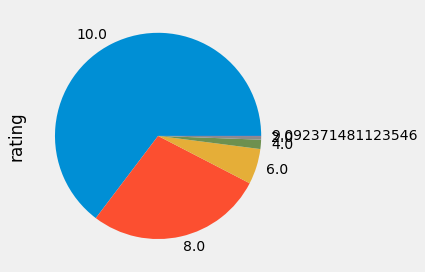

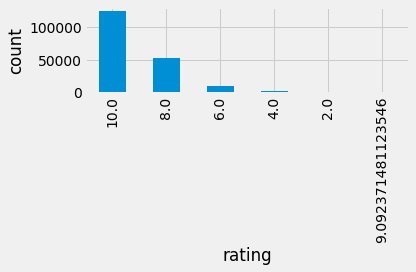

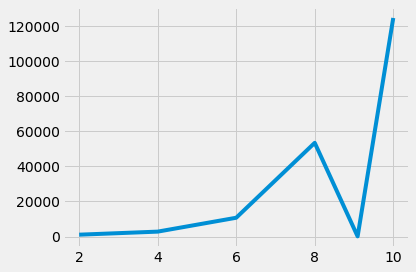

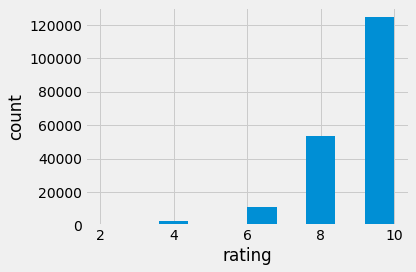

In [ ]:
plot_pie_chart(clothing_data, 'rating', "filename.png")
plot_bar_graph(clothing_data, 'rating', "filename.png")
plot_line_chart(clothing_data, 'rating', "filename.png")
plot_hist_graph(clothing_data, 'rating', "filename.png")

In [ ]:
#clothing_data['weight'].astype('weightPounds': 'float')
#clothing_data["weight"] = clothing_data["weight"].str.extract("(\d+)", expand=True)
#clothing_data.loc[clothing_data['weight'].isna(), 'weight'] = np.mean(clothing_data['weight'].separate[])
#clothing_data['weight'] = clothing_data['weight'].apply(lambda x: separate(x))

PREPROCESSING FOR BUST SIZE

In [ ]:
bust_data = clothing_data['bust size'].str.extract('([^a-zA-Z]+)([a-zA-Z]+)', expand=True)
bust_data.columns = ['bust_size', 'bust_type']
clothing_data = clothing_data.join(bust_data)
clothing_data = clothing_data.astype({'bust_size': 'float'})
clothing_data = clothing_data.drop(columns=['bust size'])

In [ ]:
clothing_data

,fit,user_id,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,bust_size,bust_type
0,0,420272,2260466,137.000000,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",34.0,d
1,0,273551,153475,132.000000,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",34.0,b
2,0,360448,1063761,137.391709,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015",NaN,NaN
3,0,909926,126335,135.000000,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",34.0,c
4,0,151944,616682,145.000000,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",34.0,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,0,66386,2252812,140.000000,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016",34.0,dd
192540,0,118398,682043,100.000000,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016",32.0,c
192541,0,47002,683251,135.000000,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016",36.0,a
192542,0,961120,126335,165.000000,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015",36.0,c


In [ ]:
print(clothing_data.bust_size.isna().sum())
print(clothing_data.bust_type.isna().sum())

18411
18411


In [ ]:
#imputing by mode
clothing_data.loc[clothing_data['bust_size'].isna(), 'bust_size'] = clothing_data['bust_size'].value_counts().index[0]
clothing_data.loc[clothing_data['bust_type'].isna(), 'bust_type'] = clothing_data['bust_type'].value_counts().index[0]

In [ ]:
print(clothing_data.bust_size.isna().sum())
print(clothing_data.bust_type.isna().sum())

0
0


In [ ]:
clothing_data

,fit,user_id,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,bust_size,bust_type
0,0,420272,2260466,137.000000,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",34.0,d
1,0,273551,153475,132.000000,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",34.0,b
2,0,360448,1063761,137.391709,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015",34.0,c
3,0,909926,126335,135.000000,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",34.0,c
4,0,151944,616682,145.000000,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",34.0,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,0,66386,2252812,140.000000,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016",34.0,dd
192540,0,118398,682043,100.000000,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016",32.0,c
192541,0,47002,683251,135.000000,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016",36.0,a
192542,0,961120,126335,165.000000,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015",36.0,c


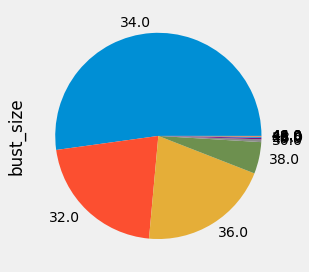

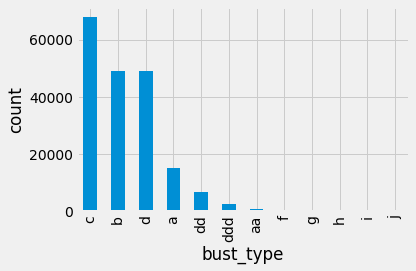

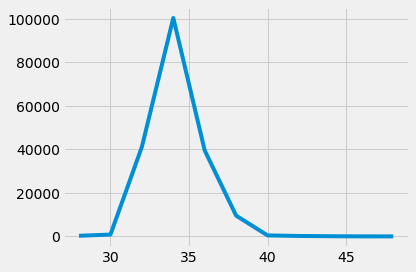

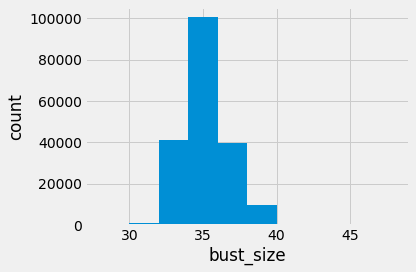

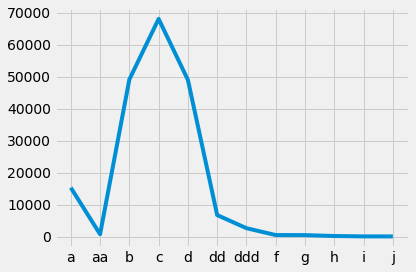

In [ ]:
plot_pie_chart(clothing_data, 'bust_size', "filename.png")
plot_bar_graph(clothing_data, 'bust_type', "filename.png")
plot_line_chart(clothing_data, 'bust_size', "filename.png")
plot_hist_graph(clothing_data, 'bust_size', "filename.png")
plot_line_chart(clothing_data, 'bust_type', "filename.png")


Combining all into 1 block

In [10]:
#modifying fit column
def compare_fit(x):
  if x == 'fit':
    return 0
  elif x == 'small':
    return -1
  else:
    return 1
  

def preprocessing_1(df):
  
  #preprocessing for fit
  #df['fit'] = df['fit'].apply(lambda x: compare_fit(x))
  #plot_pie_chart(df, 'fit', "filename.png")
  
  #preprocessing for rating
  df['rating'].fillna((df['rating'].mean()), inplace=True)
  #plot_line_chart(df, 'rating', "filename.png")
  
  #preprocessing weight
  df["weight"] = df["weight"].str.extract("(\d+)", expand=True)
  #df[['weight']].head
  df = df.astype({'weight': 'float'})
  df['weight'].fillna((df['weight'].mean()), inplace=True)
  #plot_line_chart(df, 'weight', "filename.png")
  

  #preprocessing bust size
  bust_data = df['bust size'].str.extract('([^a-zA-Z]+)([a-zA-Z]+)', expand=True)
  bust_data.columns = ['bust_size', 'bust_type']
  df = df.join(bust_data)
  df = df.astype({'bust_size': 'float'})
  df = df.drop(columns=['bust size'])

  df.loc[df['bust_size'].isna(), 'bust_size'] = df['bust_size'].value_counts().index[0]
  df.loc[df['bust_type'].isna(), 'bust_type'] = df['bust_type'].value_counts().index[0]

  #plot_line_chart(df, 'bust_size', "filename.png")
  #plot_line_chart(df, 'bust_type', "filename.png")

  return df

  

In [11]:
import math
def inches_from_feet(feet):
  if type(feet) != str and math.isnan(feet):
    return float('nan')
  else:
    return 12 * int(feet[0]) + int(feet[3])


def convert_size(size):
  if size < 5:
    return "XS"
  elif size < 10:
    return "S"
  elif size < 15:
    return "M"
  elif size < 20:
    return "L"
  else:
    return "XL"

def mark_rare_categories(category, counts):
  if counts[category] < 100:
    return "Others"
  return category


# Return processed df
def preprocessing_3(df):

  replace_category = {
    'culotte': 'culottes',
    'legging': 'leggings',
    'pant': 'pants',
    'skirt': 'skirts', 
    'skort': 'skirts',
    'trouser': 'trousers',
    'cami': 'crewneck', 
    'henley': 'crewneck', 
    'duster': 'crewneck',
    'sheath': 'shift',
    'down': 'gown'
  }
  df['category'].replace(replace_category, inplace = True)
  category_count = df['category'].value_counts()
  df['category'] = df['category'].apply(lambda x: mark_rare_categories(x, category_count))
  # all_categories = {}
  # for index, val in enumerate(sorted(df['category'].unique())):
  #   all_categories[val] = index
  # df['category'] = df['category'].apply(lambda x: all_categories[x])
  # plot_hist_graph(df, 'category', 'filename.png')


  # Processing height
  df['height'] = df['height'].apply(lambda x: inches_from_feet(x))
  df['height'].fillna(int(df['height'].mean()), inplace=True)
  # plot_line_chart(df, 'height', "filename.png")


  # Processing size
  # plot_line_chart(df, 'size', "filename.png")
  df['size'] = df['size'].apply(lambda x: convert_size(x))
  # plot_pie_chart(df, 'size', "filename.png")

  # Processing age
  median_age = df['age'].median()
  df['age'].fillna(median_age, inplace=True)
  df.loc[((df['age'] == 0) | (df['age'] >= 100)), 'age'] = median_age
  # plot_line_chart(df, 'age', "filename.png")
  
  return df

In [12]:
clothing_data1 = preprocessing_1(clothing_data.copy())
#clothing_data2 = preprocessing_2(clothing_data1.copy())
clothing_data3 = preprocessing_3(clothing_data1.copy())
clothing_data_processed = clothing_data3.drop(['review_date'], axis=1)
clothing_data_processed


,fit,user_id,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,bust_size,bust_type
0,fit,420272,2260466,137.000000,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,M,28.0,34.0,d
1,fit,273551,153475,132.000000,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,M,36.0,34.0,b
2,fit,360448,1063761,137.391709,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,shift,64.0,XS,32.0,34.0,c
3,fit,909926,126335,135.000000,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,S,34.0,34.0,c
4,fit,151944,616682,145.000000,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,M,27.0,34.0,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,140.000000,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,69.0,S,42.0,34.0,dd
192540,fit,118398,682043,100.000000,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,61.0,XS,29.0,32.0,c
192541,fit,47002,683251,135.000000,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,68.0,S,31.0,36.0,a
192542,fit,961120,126335,165.000000,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,66.0,L,31.0,36.0,c


## Neural network based CF

In [13]:
from surprise import Dataset
from surprise import Reader
from surprise import BaselineOnly

import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
from surprise.model_selection import train_test_split

from surprise import KNNWithMeans  #Memory based, Collaborative Based Filtering
from surprise import SVD  #Model Based, Matrix Factorization

from surprise.model_selection import GridSearchCV

from surprise import accuracy

In [14]:
#list out all users, no repetition of users and place an index to each user.
user_ids = clothing_data_processed["user_id"].unique().tolist()

#index all the unique users
user_encoded = {x: i for i, x in enumerate(user_ids)}
#print(user_encoded)

userencoded2user = {i: x for i, x in enumerate(user_ids)}
#print(userencoded2user)

In [15]:
#list out all items, no repetition of items and place an index to each item.
items_ids = clothing_data_processed["item_id"].unique().tolist()
items_encoded = {x: i for i, x in enumerate(items_ids)}
#print(items_encoded)

items_encoded2items = {i: x for i, x in enumerate(items_ids)}
#print(items_encoded2items)

In [16]:
clothing_data_processed_new = clothing_data_processed.copy()
clothing_data_processed_new["userfind"] = clothing_data_processed_new["user_id"].map(user_encoded)
clothing_data_processed_new["itemfind"] = clothing_data_processed_new["item_id"].map(items_encoded)

clothing_data_processed_new

,fit,user_id,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,bust_size,bust_type,userfind,itemfind
0,fit,420272,2260466,137.000000,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,M,28.0,34.0,d,0,0
1,fit,273551,153475,132.000000,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,M,36.0,34.0,b,1,1
2,fit,360448,1063761,137.391709,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,shift,64.0,XS,32.0,34.0,c,2,2
3,fit,909926,126335,135.000000,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,S,34.0,34.0,c,3,3
4,fit,151944,616682,145.000000,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,M,27.0,34.0,b,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,140.000000,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,69.0,S,42.0,34.0,dd,34375,2197
192540,fit,118398,682043,100.000000,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,61.0,XS,29.0,32.0,c,30897,2414
192541,fit,47002,683251,135.000000,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,68.0,S,31.0,36.0,a,1215,1611
192542,fit,961120,126335,165.000000,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,66.0,L,31.0,36.0,c,105569,3


In [17]:
num_users = len(user_encoded)
num_items = len(items_encoded2items)

clothing_data_processed_new["rating"] = clothing_data_processed_new["rating"].values.astype(np.float32)

# min and max ratings will be used to normalize the ratings later
min_rating = min(clothing_data_processed_new["rating"])
max_rating = max(clothing_data_processed_new["rating"])

print(
    "Number of users: {}, Number of items: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_items, min_rating, max_rating
    )
)

Number of users: 105571, Number of items: 5850, Min rating: 2.0, Max rating: 10.0


In [18]:
#Prepare training and validation data, set seed, normalise rating

clothing_data_processed_new = clothing_data_processed_new.sample(frac=1, random_state=123)
x = clothing_data_processed_new[["userfind", "itemfind"]].values

# Normalize the targets between 0 and 1. Makes it easy to train.
y = clothing_data_processed_new["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Assuming training on 80% of the data and validating on 20%.
train_indices = int(0.80 * clothing_data_processed_new.shape[0])  #take 80% of the rows as training data

x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

https://towardsdatascience.com/movie-recommender-system-a5dbfdb2585d

he_normal> It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.

EMBEDDING_SIZE>  Embedding is the concept of mapping from discrete objects such as words to vectors and real numbers. 
Keras offers an Embedding layer that can be used for neural networks on text data. It requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API also provided with Keras.
There are a few different embedding vector sizes, including 50, 100, 200 and 300 dimensions. You can download this collection of embeddings and we can seed the Keras Embedding layer with weights from the pre-trained embedding for the words in your training dataset.

In [19]:
EMBEDDING_SIZE = 50


class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_items, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        
        self.num_users = num_users
        self.num_items = num_items
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        
        
        
        self.items_embedding = layers.Embedding(
            num_items,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.items_bias = layers.Embedding(num_items, 1)

        
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0]) #all rows of column 0
        user_bias = self.user_bias(inputs[:, 0])  #all rows of column 0
        items_vector = self.items_embedding(inputs[:, 1]) #all rows of column 1
        items_bias = self.items_bias(inputs[:, 1])  #all rows of column 1
        
        dot_user_items = tf.tensordot(user_vector, items_vector, 2)
        # Add all the components (including bias)
        x = dot_user_items + user_bias + items_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)

model = RecommenderNet(num_users, num_items, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001)
)

In [21]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=500,
    epochs=10,
    verbose=1,
    validation_data=(x_val, y_val),
)


Epoch 1/10
309/309 [==============================] - 14s 46ms/step - loss: 0.3507 - val_loss: 0.5797
Epoch 2/10
309/309 [==============================] - 14s 46ms/step - loss: 0.3482 - val_loss: 0.5817
Epoch 3/10
309/309 [==============================] - 14s 46ms/step - loss: 0.3457 - val_loss: 0.5852
Epoch 4/10
309/309 [==============================] - 14s 46ms/step - loss: 0.3436 - val_loss: 0.5892
Epoch 5/10
309/309 [==============================] - 14s 46ms/step - loss: 0.3412 - val_loss: 0.5897
Epoch 6/10
309/309 [==============================] - 14s 45ms/step - loss: 0.3396 - val_loss: 0.5911
Epoch 7/10
309/309 [==============================] - 14s 46ms/step - loss: 0.3388 - val_loss: 0.5951
Epoch 8/10
309/309 [==============================] - 14s 45ms/step - loss: 0.3387 - val_loss: 0.5952
Epoch 9/10
309/309 [==============================] - 14s 45ms/step - loss: 0.3415 - val_loss: 0.6047
Epoch 10/10
309/309 [==============================] - 14s 46ms/step - loss: 0.352

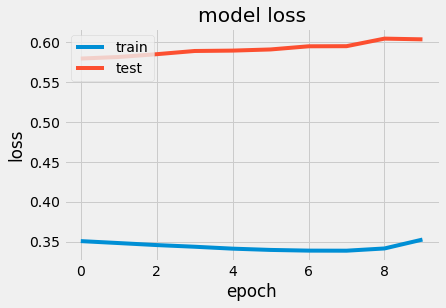

In [22]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()


 Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

In [23]:
model = RecommenderNet(num_users, num_items, EMBEDDING_SIZE)
model.compile(
    keras.optimizers.Adam(lr=0.001), loss="mean_squared_error",
    metrics=["mean_absolute_error", "mean_squared_error"])

In [25]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=100,
    epochs=10,
    verbose=1,
    validation_data=(x_val, y_val),
)


Epoch 1/10
1541/1541 [==============================] - 68s 44ms/step - loss: 0.0561 - mean_absolute_error: 0.1634 - mean_squared_error: 0.0472 - val_loss: 0.0495 - val_mean_absolute_error: 0.1639 - val_mean_squared_error: 0.0399
Epoch 2/10
1541/1541 [==============================] - 68s 44ms/step - loss: 0.0459 - mean_absolute_error: 0.1163 - mean_squared_error: 0.0367 - val_loss: 0.0700 - val_mean_absolute_error: 0.2106 - val_mean_squared_error: 0.0612
Epoch 3/10
1541/1541 [==============================] - 70s 45ms/step - loss: 0.0566 - mean_absolute_error: 0.1602 - mean_squared_error: 0.0472 - val_loss: 0.0487 - val_mean_absolute_error: 0.1595 - val_mean_squared_error: 0.0389
Epoch 4/10
1541/1541 [==============================] - 70s 46ms/step - loss: 0.0446 - mean_absolute_error: 0.1161 - mean_squared_error: 0.0351 - val_loss: 0.0637 - val_mean_absolute_error: 0.1962 - val_mean_squared_error: 0.0546
Epoch 5/10
1541/1541 [==============================] - 70s 45ms/step - loss: 0.

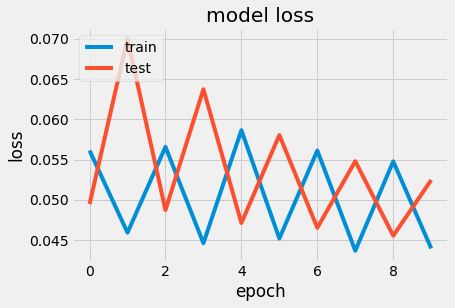

In [26]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [28]:
#the top recommendations.
user_selected = clothing_data_processed_new.user_id.sample().iloc[0]  #the first row.

recommended_items = clothing_data_processed_new[clothing_data_processed_new.user_id == user_selected]
print(recommended_items)

          fit  user_id  item_id  ...  bust_type  userfind itemfind
164811  large   566309   130259  ...          c       376        7
106134  large   566309  2195049  ...          c       376     1714
28619   large   566309  2926339  ...          c       376     3798
159468    fit   566309   667268  ...          c       376     3762
20352     fit   566309   374312  ...          c       376      131
37924   small   566309  2776206  ...          c       376     2011
180300    fit   566309  1991314  ...          c       376      774
136880    fit   566309  1875650  ...          c       376      299
87013   small   566309   765009  ...          c       376     3304
178514    fit   566309  2769473  ...          c       376     1172
63136     fit   566309  2120468  ...          c       376     3780
119657    fit   566309  2783742  ...          c       376     1010
80103   large   566309  2426137  ...          c       376      963
169298    fit   566309   158028  ...          c       376     